In [1]:
from pprint import pprint
import os

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import datetime

In [5]:
from seaborn import heatmap

# MEMBERS

In [6]:
members = pd.read_csv("members.csv", parse_dates=["registration_init_time", "expiration_date"])

In [7]:
members.rename(columns={"msno": "member"}, inplace=True)

In [8]:
members.head()

,member,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


In [9]:
members.registration_init_time.dtype

dtype('<M8[ns]')

In [10]:
# quick check
len(members) == members.member.nunique()

True

In [11]:
members.member.nunique()

34403

## MEMBERS | gender

In [12]:
members_counts = members.gender.value_counts(dropna=False)

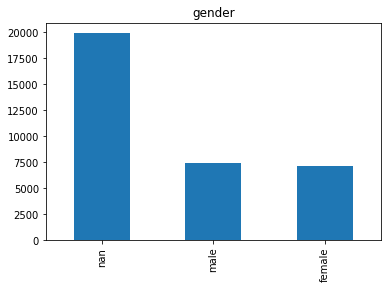

In [13]:
members_counts.plot(kind='bar', subplots=True)
plt.show()

In [106]:
print(members_counts.max() * 100 / members_counts.sum(), "% of the members have no gender value")

57.849606139 % of the members have no gender value


In [15]:
members.gender.describe()

count     14501
unique        2
top        male
freq       7405
Name: gender, dtype: object

## MEMBERS | city

In [16]:
city_counts = members.city.value_counts(dropna=False, sort=False)

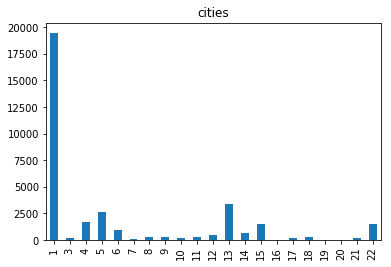

In [17]:
city_counts.plot(kind='bar', title="cities")
plt.show()

In [18]:
print(city_counts.max() * 100 / city_counts.sum(), "% of the members are concentrated in one city")

56.5212336133 % of the members are concentrated in one city


In [19]:
members.head()

,member,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


## MEMBERS | registration process

In [20]:
registration_kind = members.registered_via.value_counts(dropna=False)

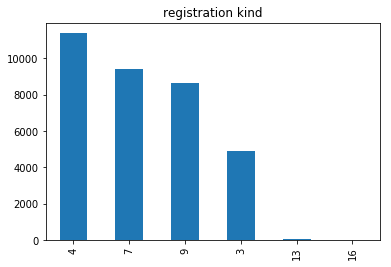

In [21]:
registration_kind.plot(kind='bar', title="registration kind")
plt.show()

In [22]:
print("Only", np.round((registration_kind[-2:].sum() * 100 / registration_kind.sum()), 1), "% of the population registered with process {} and {}".format(*registration_kind[-2:].index.values))

Only 0.2 % of the population registered with process 13 and 16


In [23]:
registration_kind

4     11392
7      9433
9      8628
3      4879
13       70
16        1
Name: registered_via, dtype: int64

In [24]:
len(members.registered_via)

34403

### registration kind in time

In [25]:
groups = members[["registered_via", "registration_init_time"]].groupby(["registered_via"])

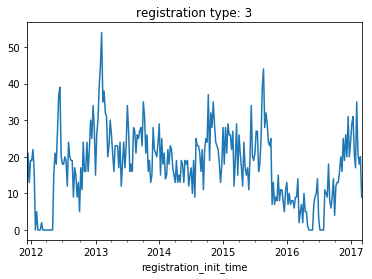

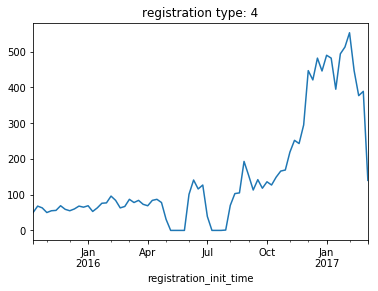

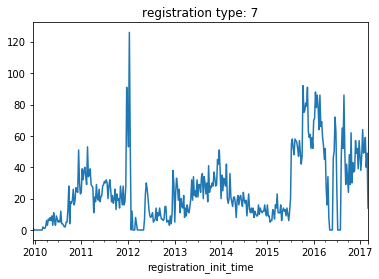

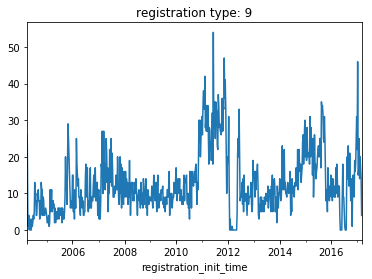

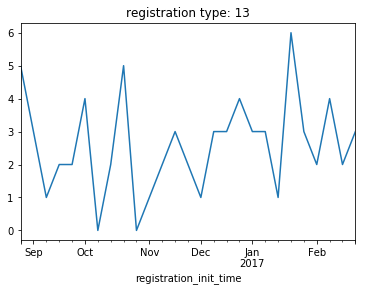

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=2339.0, right=2339.0
  'left=%s, right=%s') % (left, right))


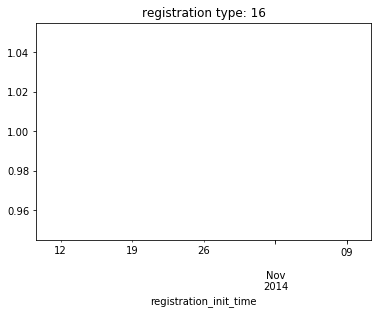

In [26]:
for name, group in groups:
    group.set_index("registration_init_time", inplace=True)
    group.resample("W").count().plot(title=f"registration type: {name}", legend=False)
    plt.show()

Interesting but we will come back to this later only. Maybe it will depict a trend between user of the same kind, or a favourite registration type depending on the user device

## MEMBERS | age

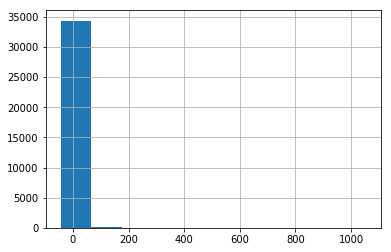

In [27]:
bdays = members.bd
bdays.hist()
plt.show()

We observe that many wsdm members are still in their mom's belly or are older than yoda.
Let's re-plot this distribution with ordinary people only.

In [28]:
credible_bd = bdays[(bdays > 0) & (bdays < 100)]

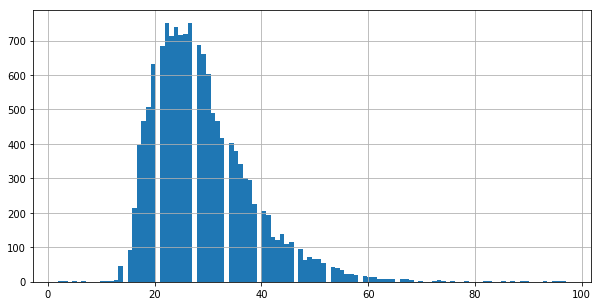

In [29]:
credible_bd.hist(bins=110, figsize=(10, 5))
plt.show()

In [30]:
print(f"The most member age is {credible_bd.mode().values[0]} years old")

The most member age is 22 years old


In [31]:
members.head()

,member,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011-08-20,2017-09-20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015-06-28,2017-06-22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016-04-11,2017-07-12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015-09-06,2015-09-07
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017-01-26,2017-06-13


# Train

In [33]:
train = pd.read_csv("train.csv")

In [34]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [35]:
train.rename(columns={"msno": "member"}, inplace=True)

In [36]:
len(train), train.member.nunique(), train.song_id.nunique()

(7377418, 30755, 359966)

Having more songs than users, we could a priori get a model more accurate model based recommender with an item_based one. Remains to see if we can extract interesting features from the songs.

But we explore the train set a bit more before.

In [37]:
screen_tab = pd.crosstab(train.source_screen_name, train.source_system_tab)
screen_type = pd.crosstab(train.source_screen_name, train.source_type)
tab_type = pd.crosstab(train.source_system_tab, train.source_type)

In [38]:
screen_type

source_type,album,artist,listen-with,local-library,local-playlist,my-daily-playlist,online-playlist,radio,song,song-based-playlist,top-hits-for-artist,topic-article-playlist
source_screen_name,,,,,,,,,,,,
Album more,417638,0,3,751,391,0,71,484,9,4,31,0
Artist more,240,0,0,2,3,0,861,211,459,0,250653,0
Concert,0,0,0,0,0,0,47,0,0,0,0,0
Discover Chart,19,0,4,28,2,0,213317,56,2,230,0,0
Discover Feature,11413,0,385,842,289,351,149698,517,231,80431,89,0
Discover Genre,5983,0,0,46,2,0,76094,19,2,56,0,0
Discover New,1906,0,0,0,8,0,14016,13,3,9,0,0
Explore,7893,0,129,202,124,0,57508,30,1359,12,988,4079
Local playlist more,17571,2847,194,2161243,1033528,26,8011,1184,119,2174,1302,0


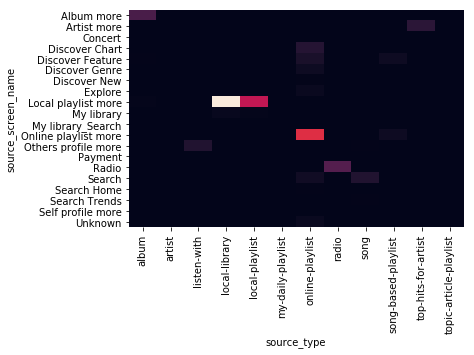

In [39]:
heatmap(screen_type, cbar=False)
plt.show()

Those heatmap say about how the app is built.
We see the relation between the screen displayed to the user and the tab he will use to listen a song for the first time, and the app endpoint of the song source.

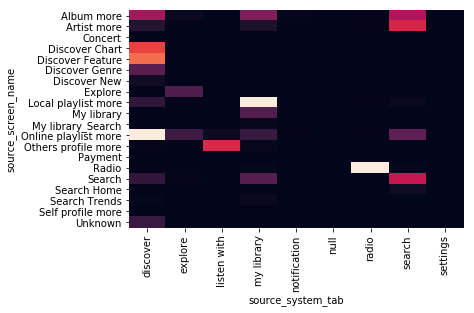

In [40]:
heatmap(screen_tab, cbar=False, vmax=350000)
plt.show()

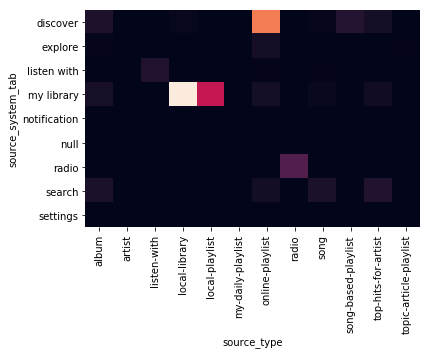

In [41]:
heatmap(tab_type, cbar=False)
plt.show()

In [42]:
train.source_type.value_counts()

local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: source_type, dtype: int64

This above shows people habits, listening more to songs they already have in their library as app suggestion features like "listen with".

## SONGS

In [43]:
songs = pd.read_csv("songs.csv")

In [44]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [45]:
print(f"We have {len(songs)} songs here.")

We have 2296320 songs here.


In [46]:
songs.song_id.nunique()

2296320

## SONGS | hits

Just a s an aside, let's see what are the hits.

In [47]:
charts = train.groupby("song_id").count()
charts = charts.sort_values("target")["target"]

In [48]:
charts.describe()

count    359966.000000
mean         20.494763
std         182.237223
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max       13973.000000
Name: target, dtype: float64

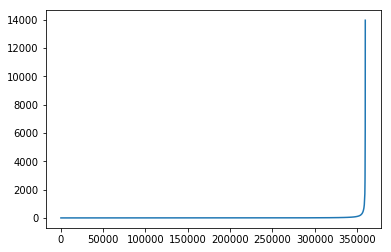

In [49]:
plt.plot(charts.values)
plt.show()

It looks like the listenings are highly concentrated on few songs.
It's really time to build better recommandation systems for people, and for small artists.

In [50]:
hits = charts[charts > 1000]

In [51]:
hits.head()

song_id
uqAC2xXadstPtvEM85HTFQyXNaPgtUgNR0TnRGM1drw=    1002
lq1IDPlzEF6N//1RZc5Gg5jDopI6HLg7obhf5kXMxUA=    1004
20mL8PEvJ/lGUPNkhfWEix5PHG5Dlc+vT0lh6PHtzao=    1004
CsqfeIr3/stOaLTq+Z+Yt6VnPSqPWS2wxxnCKJL86oM=    1006
tpsX+zae7W9+0Y/hpsAJBpQLxvctzbEUeTkYPCpf040=    1006
Name: target, dtype: int64

In [52]:
hits = pd.DataFrame(hits).reset_index()

In [53]:
hits = hits.merge(songs, on="song_id", how="inner")

In [54]:
hits

,song_id,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,uqAC2xXadstPtvEM85HTFQyXNaPgtUgNR0TnRGM1drw=,1002,285312,458,王菲 (Faye Wong),陳小霞,姚若龍,3.0
1,lq1IDPlzEF6N//1RZc5Gg5jDopI6HLg7obhf5kXMxUA=,1004,258902,465,陳奕迅 (Eason Chan),陳建寧+陳政卿,許常德,3.0
2,20mL8PEvJ/lGUPNkhfWEix5PHG5Dlc+vT0lh6PHtzao=,1004,111177,921,Various Artists,Justin Hurwitz| Benj Pasek| Justin Paul,NaN,52.0
3,CsqfeIr3/stOaLTq+Z+Yt6VnPSqPWS2wxxnCKJL86oM=,1006,220917,1616,Martin Garrix| Dua Lipa,Martijn Garritsen| Georgia Ku Overton| Nathani...,Martijn Garritsen| Georgia Ku Overton| Nathani...,52.0
4,tpsX+zae7W9+0Y/hpsAJBpQLxvctzbEUeTkYPCpf040=,1006,288287,465,陳奕迅 (Eason Chan),小柯,小柯,3.0
5,JN8XYoc7IXZTmzCqewCrqUjnSOIwvFsanbrajmaZSck=,1006,325485,465,家家 (JiaJia),木蘭號AKA陳韋伶,木蘭號AKA陳韋伶,3.0
6,q6B5uHxRAGz4kPmz3+NXghhQjbdAcxlTdUwkBcXswzw=,1007,196512,465,田馥甄 (Hebe),黃淑惠,黃淑惠,3.0
7,OU6HcDvcWRYABsVBVZwr1LBphbvVsaiJi4/0SpsS4jg=,1008,229564,1259,頑童MJ116,頑童MJ116,頑童MJ116,3.0
8,+2Ds+tDr0QXQ5vtW+ygssPP/Fm9YFp6iELmpex7pLcU=,1008,201691,921,Heize,Nam Hyeseung| Park Sanghui,Kim Kyunghee| Nam Hyeseung,31.0
9,i+VG863+oGmMZQ5T1hnd6jr6D7RgRstsePiUoNNpQUw=,1008,255456,465,丁噹 (Della),V.K克,陳沒,3.0


The dataset is from KKBOX, Asia’s leading music streaming service, so we should not be suprised by the omnipresence of asian characters. We are still a bit confused though to determine if this hits list makes sense.
Fortunately, we recognize this good old David Guetta at the 22th position, so we are golden.

## Songs | hits | genre, languages

In [55]:
hits.genre_ids.value_counts()

465            511
458            280
921             62
1609            46
444             45
1259            20
2022            13
359             12
444|1259        11
465|1259         9
139              7
451              6
465|458          4
921|465          4
1616|1609        4
921|458          3
139|125|109      3
1011             3
2157             2
1609|458         2
465|2022         2
1616             2
2122             1
437              1
465|1011         1
691              1
Name: genre_ids, dtype: int64

In [56]:
hits.language.value_counts()

 3.0     719
 52.0    199
 31.0    121
 10.0     13
 17.0      9
-1.0       6
 24.0      5
Name: language, dtype: int64

In [57]:
hits[hits.language == 3]

,song_id,target,song_length,genre_ids,artist_name,composer,lyricist,language
0,uqAC2xXadstPtvEM85HTFQyXNaPgtUgNR0TnRGM1drw=,1002,285312,458,王菲 (Faye Wong),陳小霞,姚若龍,3.0
1,lq1IDPlzEF6N//1RZc5Gg5jDopI6HLg7obhf5kXMxUA=,1004,258902,465,陳奕迅 (Eason Chan),陳建寧+陳政卿,許常德,3.0
4,tpsX+zae7W9+0Y/hpsAJBpQLxvctzbEUeTkYPCpf040=,1006,288287,465,陳奕迅 (Eason Chan),小柯,小柯,3.0
5,JN8XYoc7IXZTmzCqewCrqUjnSOIwvFsanbrajmaZSck=,1006,325485,465,家家 (JiaJia),木蘭號AKA陳韋伶,木蘭號AKA陳韋伶,3.0
6,q6B5uHxRAGz4kPmz3+NXghhQjbdAcxlTdUwkBcXswzw=,1007,196512,465,田馥甄 (Hebe),黃淑惠,黃淑惠,3.0
7,OU6HcDvcWRYABsVBVZwr1LBphbvVsaiJi4/0SpsS4jg=,1008,229564,1259,頑童MJ116,頑童MJ116,頑童MJ116,3.0
9,i+VG863+oGmMZQ5T1hnd6jr6D7RgRstsePiUoNNpQUw=,1008,255456,465,丁噹 (Della),V.K克,陳沒,3.0
10,NW6V2a9VkZhSiH5Pi5tniwclFMrQtgqJY+md+34Lokw=,1009,235206,465,韋禮安 (William Wei),韋禮安,韋禮安,3.0
11,k4GxTaY1UF8dTsAvDFCjQJZlqnVEsH4OZsGUT0oZjAw=,1009,293877,465,李榮浩,Ronghao Li,Huang Wei Wen,3.0
12,2Uz9IOJS0RNy8ut4rFz1uFWyOo/wHL+UzyBP4ht+71Y=,1010,232803,458,周杰倫 (Jay Chou),周杰倫,方文山,3.0


7 languages are represented in these hits, with a large dominance from Chinese, English and Korean

In [58]:
hits[hits.genre_ids == "465"]

,song_id,target,song_length,genre_ids,artist_name,composer,lyricist,language
1,lq1IDPlzEF6N//1RZc5Gg5jDopI6HLg7obhf5kXMxUA=,1004,258902,465,陳奕迅 (Eason Chan),陳建寧+陳政卿,許常德,3.0
4,tpsX+zae7W9+0Y/hpsAJBpQLxvctzbEUeTkYPCpf040=,1006,288287,465,陳奕迅 (Eason Chan),小柯,小柯,3.0
5,JN8XYoc7IXZTmzCqewCrqUjnSOIwvFsanbrajmaZSck=,1006,325485,465,家家 (JiaJia),木蘭號AKA陳韋伶,木蘭號AKA陳韋伶,3.0
6,q6B5uHxRAGz4kPmz3+NXghhQjbdAcxlTdUwkBcXswzw=,1007,196512,465,田馥甄 (Hebe),黃淑惠,黃淑惠,3.0
9,i+VG863+oGmMZQ5T1hnd6jr6D7RgRstsePiUoNNpQUw=,1008,255456,465,丁噹 (Della),V.K克,陳沒,3.0
10,NW6V2a9VkZhSiH5Pi5tniwclFMrQtgqJY+md+34Lokw=,1009,235206,465,韋禮安 (William Wei),韋禮安,韋禮安,3.0
11,k4GxTaY1UF8dTsAvDFCjQJZlqnVEsH4OZsGUT0oZjAw=,1009,293877,465,李榮浩,Ronghao Li,Huang Wei Wen,3.0
13,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,1010,227404,465,R. City feat. Adam Levine,Theron Thomas| Timothy Thomas| Lukasz Gottwald...,Theron Thomas| Timothy Thomas| Lukasz Gottwald...,52.0
15,r6I4+FxUYbix9NF1HGERjfUEdVIjTPWflnmzejY5Tg4=,1012,204904,465,張韶涵 (Angela Chang),Hermanni Kovalainen / Ilanguaq Lumholt / Henri...,姚若龍,3.0
18,ghS3qE34F8VPUwGaKcIKjQJEvAgFU25bA3AVaZGoG78=,1013,145815,465,Daniel Powter,Daniel Powter| John Fields| Vanessa Amorosi,Daniel Powter| John Fields| Vanessa Amorosi,52.0


We don't go further now to find out to which genre the genre id's correspond.

We notice that big artist are represented several times in those hits. Like Ed Sheeran, Maroon 5 or Justin Bieber.

## Songs | lengths

Music industry nowadays pushes artist to write songs in  predictable format, with short length favored, to avoid listeners boredom and to be more broadcastable by radioprograms. We are curious to see if we can verify this.

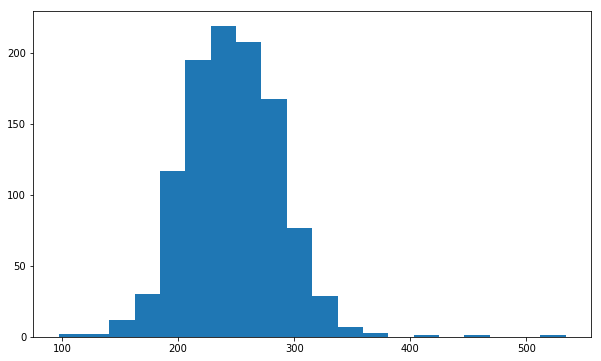

In [105]:
plt.figure(figsize=(10, 6))
plt.hist(hits.song_length.astype('m8[s]').astype(np.float32), bins=20)
plt.show()

In [91]:
hits.song_length.describe()

count                      1072
mean     0 days 00:04:07.303903
std      0 days 00:00:40.236103
min      0 days 00:01:37.988000
25%      0 days 00:03:40.484500
50%      0 days 00:04:05.864000
75%      0 days 00:04:33.995250
max      0 days 00:08:54.058000
Name: song_length, dtype: object

Regarding the mean of 4min7, the standard deviation, 40 seconds, is not as small as expected.  

We would like to see what genre of music the longest hits corresponds to. Long duration are suited to genre like psychedelic rock or electro. Let's see.

In [92]:
hits.max()

song_id        zx4aCmk+b/uPmvESsG8ekvi7qWmifSPNMXg1i8wyG8Q=
target                                                13973
song_length                          0 days 00:08:54.058000
artist_name                                   鼓鼓 (GBOYSWAG)
language                                                 52
dtype: object

We see that the artist's name is G-BOY-SWAG. We won't lead our investigation further.

## Songs extra

In [107]:
extra = pd.read_csv("song_extra_info.csv")

In [116]:
extra.head(12)

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
5,QU8f6JR0/cwLGSqJX2XDVzFK0DxMaIUY15ALJXK7ziw=,Our Time,GBAYE1400079
6,O1Oj4CmnZhbHl7oyBaHSpGeu5gvcSmUydY3Awmv3uxk=,癢,HKUM70704066
7,Tr5R61AuEkN8UelOCzu09ZwQi7/HmP9sQmxf9rFngIg=,Aloha| E Komo Mai (Theme Song from Lilo & Stit...,USWD10423930
8,ie9l12ZYXEaP4evrBBUvnNnZGdupHSX5NU+tEqB1SDg=,每天愛你多一些,HKA610200010
9,6mICNlckUVGuoK/XGC7bnxXf5s2ZnkpFHShaGL/zM2Y=,你是你的,TWI431000103


In [115]:
extra.song_id.nunique(), extra.isrc.nunique()

(2295971, 1806825)

We have more song ids than isrc. Probably cause there is less control in the way song id are generated.

In [136]:
isrc_counts = extra.isrc.value_counts()
isrc_counts.head()

GBPS81518952    207
GBPS81527416    205
GBPS81518950    195
GBPS81518680    195
GBPS81518682    194
Name: isrc, dtype: int64

Something just jumped at us with this print: so much of the songs having the same isrc come from the UK. Simply cause UK  are from far the most important contributors to music production.